In [1]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    root = '/content/drive/MyDrive/colab/sat-images/'
    device = 'cuda'
    !wget -O sat.zip https://github.com/lacykaltgr/satellite-image-segmentation/archive/refs/heads/laci420.zip
    !unzip sat.zip
    !cp -r satellite-image-segmentation-laci420/src .
else:
    root = '/Users/czimbermark/DeepLearning_Projects_23/satellite-image-segmentation/data/'
    device = 'cpu'

In [2]:
import torch
from torch.utils.data import DataLoader
from src.dataset import XYDataset, load_dataset

x_train, y_train, x_val, y_val, x_test = load_dataset(root)

train_dataset = XYDataset(x_train, y_train, crop_size=256)
val_dataset = XYDataset(x_val, y_val, crop_size=256)
#test_dataset = XYDataset(x_test, torch.zeros(len(x_test)))

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
#test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [3]:
from src.model import UNet, EarlyStopper
unet = UNet().to(device)

In [ ]:
es = EarlyStopper(patience=10)
unet.train_model(train_loader, val_loader, es, num_epochs=1000, learning_rate=0.0001, device=device)

In [ ]:
predictions, results = unet.predict(train_loader, device=device)

In [ ]:
from matplotlib.pyplot import imshow, show
imshow(x)
show()

In [ ]:
from src.utils import conf_matrix
conf_matrix(val_dataset, results)

In [4]:
unet.load_state_dict(torch.load('/Users/czimbermark/DeepLearning_Projects_23/sat-img-seg-model.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
import sys
sys.path.append('/path/to/DeepLearning_Projects_23/satellite-image-segmentation/')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import imageio 

# Load image data into 'data' array (shape: h x w x band)
pil_img = imageio.read('data/The-Eye-in-the-Sky-test-data/sat_test/1.tif')
img_data = np.array(pil_img.get_data(0))
print(img_data.shape)   # (1217, 1692, 4)

(833, 881, 4)


In [7]:
from src.split import ImageProcessor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


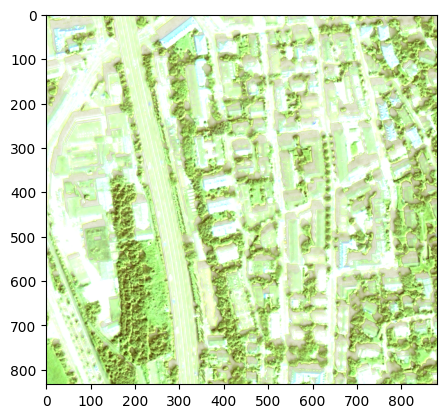

In [8]:
# Parameters:
h = 833  # original height
w = 881  # original width
band = 4  # number of bands (RGB)
size = 256  # window size (256x256)

# Create Image object and split the image into windows
img = ImageProcessor(w, h, band, size)
img.data = img_data

plt.imshow(img.data)

In [9]:
windows = img.split()

Padding: (191, 143)
Original Image Shape: (833, 881, 4)
Padded Image Shape: (1024, 1024, 4)


In [10]:
print(windows[0].data.shape)

(256, 256, 4)


In [11]:
from src.utils import predict_windows

predicted_windows = predict_windows(unet, windows)

RuntimeError: Given groups=1, weight of size [64, 4, 3, 3], expected input[1, 256, 256, 4] to have 4 channels, but got 256 channels instead

In [ ]:
# Call the 'unsplit' method to reconstruct the whole image
reconstructed_image = unsplit(self, predicted_windows)

In [ ]:
eval = unet.evaluate(val_loader, device=device)